In [1]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)
model = 'tranvae'

dir_path = os.path.expanduser(f'~/Documents/benchmarking_results/figure_5/{model}/ood_1/')
save_path = f'{dir_path}revision/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [3]:
ref = sc.read(f'{dir_path}reference_data.h5ad')
ref

AnnData object with n_obs × n_vars = 20219 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
f1 = sc.read(f'{dir_path}full_1_data.h5ad')
f1.obs.batch = f1.obs.batch.replace('10X', '10X (query)')
f1.obs.celltype = f1.obs.celltype.replace('NK cells', 'NK cells NEW')
f1

AnnData object with n_obs × n_vars = 30946 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
p_b = sns.color_palette("husl", 9)
p_c = sns.color_palette("hls", 16)
batch_color = [p_b[1],p_b[2],p_b[3],p_b[4],p_b[5],p_b[6],p_b[7],p_b[8]]
ct_color = [p_c[0],p_c[1],p_c[2],p_c[3],p_c[4],p_c[5],p_c[6],p_c[7],p_c[8],p_c[9],p_c[10],p_c[11],p_c[13],p_c[14],p_c[15]]

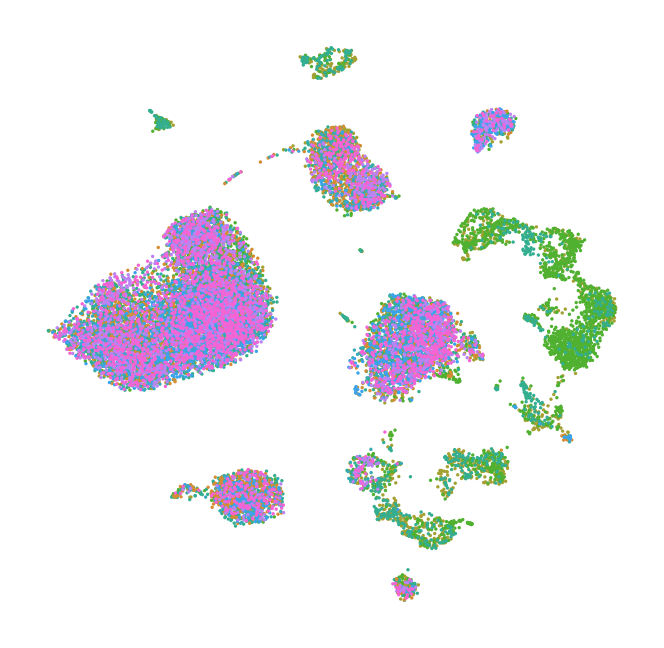

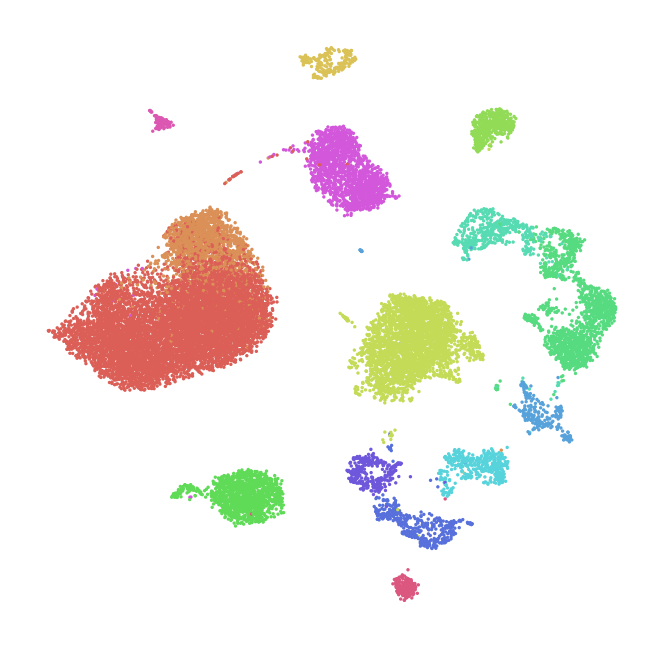

In [6]:
sc.pl.umap(
    ref,
    color="batch",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    legend_loc="no_legend",
    palette=batch_color
)
plt.savefig(f"{save_path}ref_batch.pdf", bbox_inches='tight')
sc.pl.umap(
    ref,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    legend_loc="no_legend",
    palette=ct_color
)
plt.savefig(f"{save_path}ref_ct.pdf", bbox_inches='tight')

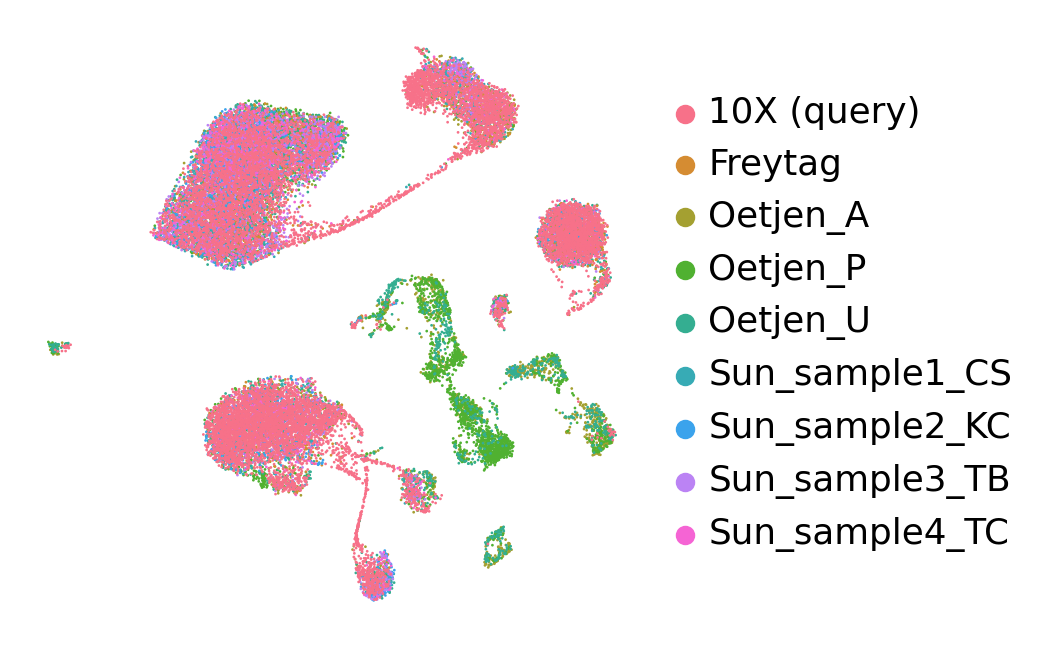

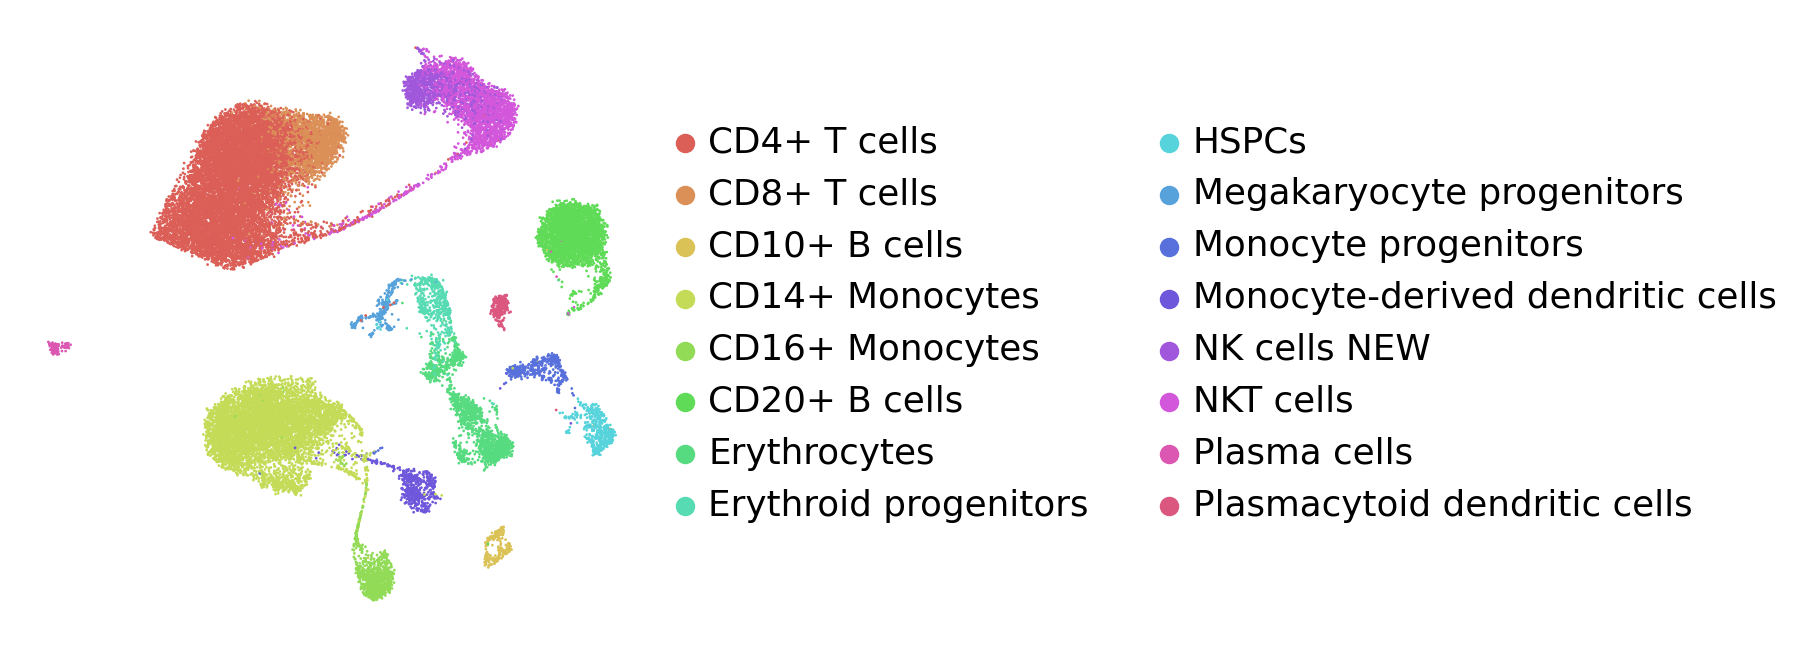

In [7]:
sc.pl.umap(
    f1,
    color="batch",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    palette=p_b
)
plt.savefig(f"{save_path}f1_batch.pdf", bbox_inches='tight')
sc.pl.umap(
    f1,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    palette=p_c
)
plt.savefig(f"{save_path}f1_ct.pdf", bbox_inches='tight')